## 네이버 블로그 시각화

## DataFrame

In [5]:
import pandas as pd
import time

In [6]:
from bs4 import BeautifulSoup as bs

In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [9]:
driver = webdriver.Chrome()

In [10]:
driver.get("https://m.search.naver.com/search.naver?sm=mtb_sug.top&where=m&ssc=tab.m.all&oquery=%EC%8A%A4%EB%A7%88%ED%8A%B8+%EB%A7%A4%ED%8A%B8&tqi=iooSKdprfjlss6leMvhssssssrK-290860&query=%EC%BD%94%EC%9B%A8%EC%9D%B4+%EC%8A%A4%EB%A7%88%ED%8A%B8+%EB%A7%A4%ED%8A%B8%EB%A6%AC%EC%8A%A4&acq=%EC%BD%94%EC%9B%A8%EC%9D%B4+%EC%8A%A4%EB%A7%88%ED%8A%B8&acr=1&qdt=0#lb_api=https%3A%2F%2Fs.search.naver.com%2Fp%2Freview%2F48%2Fsearch.naver%3Fssc%3Dtab.m_itb.all%26api_type%3D2%26query%3D%25EC%25BD%2594%25EC%259B%25A8%25EC%259D%25B4%2B%25EC%258A%25A4%25EB%25A7%2588%25ED%258A%25B8%2B%25EB%25A7%25A4%25ED%258A%25B8%25EB%25A6%25AC%25EC%258A%25A4%26start%3D1%26nx_search_query%3D%26nx_and_query%3D%26nx_sub_query%3D%26ac%3D0%26aq%3D0%26spq%3D0%26sm%3Dmtb_sug.top%26nso%3D%26prank%3D0%26ngn_country%3DKR%26lgl_rcode%3D09320106%26fgn_region%3D%26fgn_city%3D%26lgl_lat%3D37.664176%26lgl_long%3D127.040725%26enlu_query%3DIggCADCBULi5AAAAtdoURqXUdp9ygLuVMM8qJq9%252FjVYkp7UmMmJXGGRSrOICtncReQelg4rSeHUhjhfTnT3XVJH9vsNm9WWbH%252B7AwAyfB1z3GhhcTnFs%252FYePqfC%252BXclRAgGfbnqa018Pgbd6AOMwJtiS9VTDv0TmfkOFnb0m12KMG4sQCREPQC74Jqhqc8AYd9YNGVBlt6JTFher9kJZTRlBTnEWcmcbFTIhcGRkrVRYOuV0C4jpyVeFzhdWvI%252BwiPGpK59XBs2%252F0sl60gdocYRDPCH6E1QGL80Fag7GzRbv%252B1fKKY4kBhKeKzBA5lda2WeyP5806hIpyLrOovYYAFg3hda3hi5v%252BCTLWjW%252BjHOd7Sif5NGv3l8HINWvqMjc8YHLGFL5fZyCpQ1tWUpVE2swF3NhIsYfj1VbktvXGaRuSKwGNh3C0jhgAxvOlZycaHZd6ykVYcE27EBDkjqcXLwIWn%252FXwDvWpn0numjltSLcF%252F0gak5QtWjz86%252FO4Kc5rDYlQG8SIF1yrmh%252FvPc1CnI%252FdHwLGsPHcCzSIwNVRkrzKDhWqR6p53yPTvVTd1qOG2OaK0jmMPhjoiCzxed396nNHdMxsex15mKqNb2Ca6D1igVyzSigshm3HXLgLy5wVUnmGU2oRCC2l34LO57ykpMVkE9P9ltSBgz2a%252BQyz%252Beo5m5wjxv%252Ftry3rHs8leH93Q4yrkyhAFve9fQTtojzACNHxyuQo5IwPlXcP8198vqvTvMpCkwj3uu61dPTtNe3Tu1TEeyKsorLU3sxUf8ZrxYccuZFUDZ0TJHM95QQG9jAkdmmLi9SYRpT%252B4dcD0g96%252B1fQMDbpgY%252BpcIE1RslkWaiiGiOP3J3%252BOZGmMEotonZ7m7rbgIiS2oMQ%252BkR%252BICY2abiKcD25ngwHpwQXbXmm%252FEnEYFsLC8FOCnEYMSAsdI2Fgtod6y8C627ystRJNtfPpTyCQBMsamfw11xhUlZyX2b5ckIFWky1IgUDh3IU97USgpXqwknoz40W6O4tc8kXcLbT3850j2QU%252B035q60OM94OtOj5lrwIK2sqoxrJAVVtJo45GCmoYXmN%252FM%253D%26abt%3D")

In [11]:
soup  = bs(driver.page_source, 'lxml')

In [12]:
body = driver.find_element(By.CSS_SELECTOR, "body")

while True:
    last = bs(driver.page_source, 'lxml')
    
    for i in range(10):
        body.send_keys(Keys.END)
        time.sleep(1)
        
    new = bs(driver.page_source, 'lxml')
    if last == new:
        break
    else:
        pass

In [13]:
search = soup.select('a.title_link')

In [14]:
url_list = []

In [15]:
for i in search:
    url_list.append(i['href'])

In [17]:
from tqdm import tqdm

In [32]:
title_list=[]
contents_list = []

for url in tqdm(url_list):
    driver.get(url)
    time.sleep(0.5)
    try:
        title = driver.find_element(By.CSS_SELECTOR, "div.se-module.se-module-text.se-title-text")
        title_list.append(title.text)
        
        soup  = bs(driver.page_source, 'lxml')
        contents = soup.select_one('div.se-main-container')
        contents_list.append(contents.text)
    except:
        pass

100%|███████████████████████████████████████████| 37/37 [00:38<00:00,  1.03s/it]


In [35]:
data = {"title" : title_list, "content" : cleaned_contents_list}

In [36]:
blog = pd.DataFrame(data)

In [37]:
blog

,title,content
0,코웨이 비렉스 스마트 기능 매트리스 제품 사용 렌탈 후기,​ 코웨이 최저가 렌탈 사은품 많이 주는 곳 믿을 수 있는 코웨이 공식몰에서 정수기...
1,경도 조절이 가능한 코웨이 스마트 매트리스 S5 / S7 (feat. 렌탈료 3개월...,안녕하세요코웨이 고객감동대리점 신선미 점장입니다 같은 침대를 쓰는 가족끼리 (특히 ...
2,신제품으로 출시된 코웨이 비렉스 스마트 매트리스 설치했어요,​​평소에 잠을 어떻게 자는지 정말 중요하게 생각을 하는 저!제대로 잘 못 자면 정...
3,"코웨이 비렉스 스마트 매트리스 신제품 출시,기능,추천",굿모닝이에요.오늘 아침엔 다들 잠 잘 주무셨는지요?!저는 요즘 책도 바빠서 덜읽고 ...
4,코웨이 비렉스 스마트 매트리스 우리집 스마트 가전 설치 후기,아침에 눈을 뜨면 가장 먼저 하는 말이 무엇인가요? 저는 잘 잤냐고 묻게 되더라고요...
5,코웨이 비렉스 스마트 기능 매트리스 제품 사용 렌탈 후기,​ 코웨이 최저가 렌탈 사은품 많이 주는 곳 믿을 수 있는 코웨이 공식몰에서 정수기...
6,경도 조절이 가능한 코웨이 스마트 매트리스 S5 / S7 (feat. 렌탈료 3개월...,안녕하세요코웨이 고객감동대리점 신선미 점장입니다 같은 침대를 쓰는 가족끼리 (특히 ...
7,신제품으로 출시된 코웨이 비렉스 스마트 매트리스 설치했어요,​​평소에 잠을 어떻게 자는지 정말 중요하게 생각을 하는 저!제대로 잘 못 자면 정...
8,"코웨이 비렉스 스마트 매트리스 신제품 출시,기능,추천",굿모닝이에요.오늘 아침엔 다들 잠 잘 주무셨는지요?!저는 요즘 책도 바빠서 덜읽고 ...
9,코웨이 비렉스 스마트 매트리스 우리집 스마트 가전 설치 후기,아침에 눈을 뜨면 가장 먼저 하는 말이 무엇인가요? 저는 잘 잤냐고 묻게 되더라고요...


## 전처리

In [33]:
cleaned_contents_list = []

for content in contents_list:
    # 공백 및 줄바꿈 제거
    cleaned_content = content.strip()  # 양쪽 공백 제거
    
    # 연속된 공백을 단일 공백으로 변환
    cleaned_content = ' '.join(cleaned_content.split())
    
    cleaned_contents_list.append(cleaned_content)


In [34]:
cleaned_contents_list

['\u200b 코웨이 최저가 렌탈 사은품 많이 주는 곳 믿을 수 있는 코웨이 공식몰에서 정수기, 공기청정기, 비데 등 다양한 제품을 가장 저렴하게 렌탈하고 다양... blog.naver.com \u200b 코웨이 비렉스 스마트 기능 매트리스 제품 사용 렌탈 후기 침대를 교체해야해서 여러 매장을 다녀봤어요. 저는 부드러움을 선호하는데, 반면 배우자는 탄탄한 느낌을 원했어요. 결국 슈퍼싱글을 두 개 살까 고민했지만, 비용 때문에 망설였어요. 그러던 중 티비 광고에서 퀸사이즈인데 경도를 조절할 수 있는 스마트한 매트리스를 보고 선택했어요. 코웨이 비렉스 매트리스는 바로 그것이었죠. 렌탈이라 부담이 적어 처음으로 이용해봤는데, 혜택도 많아서 만족스러워요.\u200b 추천해요. 어릴 적 사용하던 매트리스가 수명을 다해 중간 부분이 푹 꺼져서 아침마다 허리가 너무 아팠어요. 이에 바꿀 생각이 들어서 코웨이 비렉스 매트리스를 알게 되었어요. 광고 속에서 보던 것과 같이 양옆 경도를 조절해 부드럽게 사용할 수 있어서 아내도 만족할 것 같아요. 일반 침대보다 두 배 이상의 비용이 들지만, 바이렉스 매트리스는 한 침대에 두 개의 매트리스를 겸비하고 있어서 저렴하게 사용할 수 있어요.\u200b 체험판을 신청해서 사용해본 결과, 제거할 필요가 없을 정도로 편안하고 좋았어요. 다만, Frein에 대한 경험은 없어서 14일 이내에 반품해야 한다는 점이 조금 아쉬웠어요. 그래도 허리가 편안해지는 매트리스를 찾는다면 코웨이 비렉스 매트리스를 추천해요. 비렉스 매트리스 S5와 S7은 주로 머리와 다리를 들 수 있는지 여부에 따라 구분돼요. 저는 허리가 아파서 S7을 선택하였어요. S7은 스마트 매트리스로서 다양한 기능을 제공하였어요. 매트리스 내부에는 스프링이 아닌 슬립 셀이라 불리는 가압 공기 에어포켓으로 채워져 있어 각 부위마다 경도를 조절할 수 있어요. 퀸 사이즈 당 80개의 셀이 있으며, 각 셀의 경도는 9단계로 조절 가능해요. 또한 4 Zone 스마트 경도 제어로 왼쪽과 오른쪽

In [24]:
from konlpy.tag import Okt

In [25]:
okt = Okt()

In [62]:
stopwords = ['있다', '되다', '하다', '나', '는', '은', '이', '가', '을', '를', '에', '에서', 
             '에게', '한테', '과', '와', '아', '랑', '으로', '로', '께서', '이나', '이라', '이야', 
             '인가', '이야말로', '그리고', '그런데', '그래서', '그래도', '그러나', '그럼에도', '그러면', 
             '그러니까', '그러므로', '그러니까', '그렇게', '그렇지만', '그렇다면', '아니면', '아니라', 
             '그런', '이런', '그렇지', '그래', '저런', '이러한', '그러한', '저러한', '어떤', '이따', 
             '이래', '이렇게', '저렇게', '그따', '그래서', '아무', '전부', '가지', '갖고', '몇', 
             '무슨', '어느', '몇몇', '어떤', '어떻게', '어떤', '아무', '나', '우리', '당신', '자기', 
             '그녀', '저희', '하다', '되다', '않다', '없다', '있다', '되어다', '하고', '그러면', 
             '그래서', '이렇게', '저렇게', '요즘', '그것', '이것', '저것', '있다고', '그렇지만', '그래도'
            '코웨이', '안녕하세요', '웅진코웨이', '\u200b', '이다', '안녕하다', '아니다', '같다']

In [63]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)
    words = [word for word, tag in pos_words if tag in ['Adjective'] if word not in stopwords ]
    return words

In [64]:
# 추출된 단어들을 저장할 리스트
extracted_words_list = []

# cleaned_contents_list에 있는 각 텍스트에 대해 okt_pos_tagging 함수 호출하여 추출된 단어들을 리스트에 저장
for text in cleaned_contents_list:
    extracted_words = okt_pos_tagging(text)
    extracted_words_list.append(extracted_words)

# 저장된 추출된 단어들 리스트 출력
for idx, extracted_words in enumerate(extracted_words_list, start=1):
    print(f"추출된 단어들: {extracted_words}")
    print()

추출된 단어들: ['다양하다', '저렴하다', '탄탄하다', '원하다', '그렇다', '많다', '만족스럽다', '아프다', '부드럽다', '만족하다', '저렴하다', '편안하다', '좋다', '아쉽다', '편안하다', '아프다', '다양하다', '가능하다', '다양하다', '저렴하다', '간단하다', '둥글다', '깨끗하다', '탄탄하다', '균등하다', '편안하다', '만족스럽다', '편안하다', '만족스럽다', '부담스럽다', '만족하다', '다르다', '좋다', '비싸다', '많다', '편안하다', '좋다', '좋다', '다르다', '깔끔하다', '저렴하다', '부담스럽다', '동일하다', '다르다', '높다', '좁다', '넓다', '탄탄하다', '안전하다', '편안하다', '깊다', '만족하다']

추출된 단어들: ['아프다', '좋아하다', '적당하다', '푹신하다', '난감하다', '이렇다', '편안하다', '좋다', '좋다', '많다', '좋다', '어렵다', '복잡하다', '편리하다', '가능하다', '간편하다', '가능하다', '안전하다', '가능하다', '편하다', '피로하다']

추출된 단어들: ['어떻다', '중요하다', '피곤하다', '예민하다', '중요하다', '좋다', '중요하다', '다르다', '많다', '만족하다', '좋다', '새롭다', '다르다', '어떻다', '간단하다', '깔끔하다', '어떻다', '좋다', '좋다', '원하다', '신기하다', '다르다', '가능하다', '가능하다', '다르다', '자유롭다', '가능하다', '푹신하다', '좋아하다', '싫어하다', '다르다', '섬세하다', '원하다', '푹신하다', '편안하다', '섬세하다', '가능하다', '신기하다', '똑똑하다', '편하다', '가능하다', '편하다', '높다', '낮다', '불편하다', '피곤하다', '좋다', '좋다', '좋다', '어떻다', '궁금하다', '가능하다', '궁금하다', '좋다', '다양하다']

추출된 단어들: ['바쁘다',

In [65]:
data = {"블로그 제목" : title_list, "블로그 내용" : cleaned_contents_list, "추출된 단어" : extracted_words_list}

In [66]:
blog = pd.DataFrame(data)

In [67]:
blog

,블로그 제목,블로그 내용,추출된 단어
0,코웨이 비렉스 스마트 기능 매트리스 제품 사용 렌탈 후기,​ 코웨이 최저가 렌탈 사은품 많이 주는 곳 믿을 수 있는 코웨이 공식몰에서 정수기...,"[다양하다, 저렴하다, 탄탄하다, 원하다, 그렇다, 많다, 만족스럽다, 아프다, 부..."
1,경도 조절이 가능한 코웨이 스마트 매트리스 S5 / S7 (feat. 렌탈료 3개월...,안녕하세요코웨이 고객감동대리점 신선미 점장입니다 같은 침대를 쓰는 가족끼리 (특히 ...,"[아프다, 좋아하다, 적당하다, 푹신하다, 난감하다, 이렇다, 편안하다, 좋다, 좋..."
2,신제품으로 출시된 코웨이 비렉스 스마트 매트리스 설치했어요,​​평소에 잠을 어떻게 자는지 정말 중요하게 생각을 하는 저!제대로 잘 못 자면 정...,"[어떻다, 중요하다, 피곤하다, 예민하다, 중요하다, 좋다, 중요하다, 다르다, 많..."
3,"코웨이 비렉스 스마트 매트리스 신제품 출시,기능,추천",굿모닝이에요.오늘 아침엔 다들 잠 잘 주무셨는지요?!저는 요즘 책도 바빠서 덜읽고 ...,"[바쁘다, 똑똑하다, 유명하다, 엄청나다, 푹신하다, 가능하다, 따뜻하다, 포근하다..."
4,코웨이 비렉스 스마트 매트리스 우리집 스마트 가전 설치 후기,아침에 눈을 뜨면 가장 먼저 하는 말이 무엇인가요? 저는 잘 잤냐고 묻게 되더라고요...,"[계시다, 짧다, 개운하다, 편안하다, 힘드다, 그렇다, 굉장하다, 놀랍다, 많다,..."
5,코웨이 비렉스 스마트 기능 매트리스 제품 사용 렌탈 후기,​ 코웨이 최저가 렌탈 사은품 많이 주는 곳 믿을 수 있는 코웨이 공식몰에서 정수기...,"[다양하다, 저렴하다, 탄탄하다, 원하다, 그렇다, 많다, 만족스럽다, 아프다, 부..."
6,경도 조절이 가능한 코웨이 스마트 매트리스 S5 / S7 (feat. 렌탈료 3개월...,안녕하세요코웨이 고객감동대리점 신선미 점장입니다 같은 침대를 쓰는 가족끼리 (특히 ...,"[아프다, 좋아하다, 적당하다, 푹신하다, 난감하다, 이렇다, 편안하다, 좋다, 좋..."
7,신제품으로 출시된 코웨이 비렉스 스마트 매트리스 설치했어요,​​평소에 잠을 어떻게 자는지 정말 중요하게 생각을 하는 저!제대로 잘 못 자면 정...,"[어떻다, 중요하다, 피곤하다, 예민하다, 중요하다, 좋다, 중요하다, 다르다, 많..."
8,"코웨이 비렉스 스마트 매트리스 신제품 출시,기능,추천",굿모닝이에요.오늘 아침엔 다들 잠 잘 주무셨는지요?!저는 요즘 책도 바빠서 덜읽고 ...,"[바쁘다, 똑똑하다, 유명하다, 엄청나다, 푹신하다, 가능하다, 따뜻하다, 포근하다..."
9,코웨이 비렉스 스마트 매트리스 우리집 스마트 가전 설치 후기,아침에 눈을 뜨면 가장 먼저 하는 말이 무엇인가요? 저는 잘 잤냐고 묻게 되더라고요...,"[계시다, 짧다, 개운하다, 편안하다, 힘드다, 그렇다, 굉장하다, 놀랍다, 많다,..."


In [68]:
# 피클 파일로 저장
pickle_file = 'blog.pkl'
blog.to_pickle(pickle_file)

## 워드 클라우드

In [69]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [73]:
count_list = []

for words in extracted_words_list:
    count  = Counter(words)
    count.most_common(100) 
    count_list.append(count)

In [80]:
# 모든 Counter 객체를 합치기
total_counter = Counter()
for counter in count_list:
    total_counter += counter

<function matplotlib.pyplot.show(close=None, block=None)>

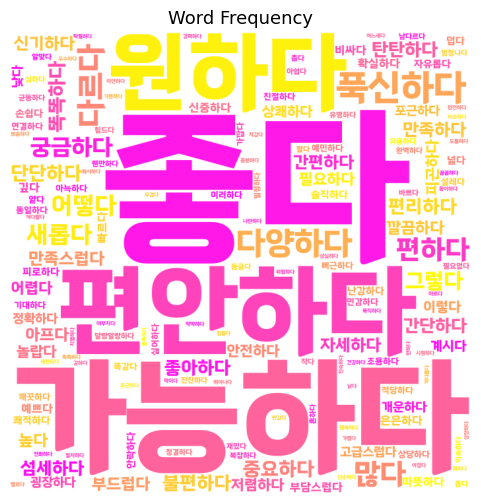

In [101]:
from wordcloud import WordCloud

# 한글 폰트 경로 설정
font_path = '/Users/kimseoyeon/Downloads/The_Jamsil_OTF_2024/The Jamsil OTF 5 Bold.otf'

# WordCloud 객체 생성
wordcloud = WordCloud(font_path=font_path,
                      width=700, 
                      height=700, 
                      background_color='white',
                      colormap='spring',
                      random_state=1).generate_from_frequencies(total_counter)

# 시각화
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size = 13) 
plt.show

## CX 지표: 5년 장기 고객 수면 점수 평균

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')

In [2]:
names = [
    "김민수", "이서연", "박지훈", "최지아", "정우진",
    "김지은", "이현우", "박민지", "최준호", "정유진",
    "김민준", "이지은", "박서준", "최수연", "정다은",
    "김현수", "이지호", "박다영", "최서현", "정민호",
    "김지훈", "이민정", "박현우", "최지민", "정다훈",
    "김유진", "이지훈", "박민서", "최준영", "정수연",
    "김서연", "이우진", "박다은", "최민호", "정지호",
    "김다은", "이현준", "박지유", "최준수", "정지민",
    "김지수", "이민수", "박현서", "최다은", "정민수",
    "김유빈", "이준서", "박서영", "최지훈", "정다영",
    "김우진", "이지후", "박민호", "최서준", "정민지",
    "김현지", "이다인", "박준영", "최유진", "정준호",
    "김지현", "이승우", "박주현", "최지호", "정다현",
    "김하은", "이준호", "박수현", "최민준", "정서윤",
    "김다인", "이지안", "박준서", "최하은", "정유나",
    "김현서", "이지수", "박소영", "최주현", "정다희",
    "김주현", "이지연", "박지우", "최수호", "정준서",
    "김나은", "이우빈", "박주은", "최하윤", "정수민",
    "김태윤", "이서윤", "박채은", "최준우", "정서진",
    "김지호", "이승현", "박지연", "최은서", "정채원"
]

In [3]:
import pandas as pd
import numpy as np

# 랜덤 시드 설정 (재현 가능성을 위해)
np.random.seed(42)

# 연도와 평균 수면 점수 설정
years = [2024, 2025, 2026, 2027, 2028, 2029]
avg_scores = [64.7, 68.9, 73.5, 80.1, 82.1, 83.3]

# 빈 데이터프레임 생성
data = pd.DataFrame()

# 더미 데이터 생성
for year, avg_score in zip(years, avg_scores):
    # 표준 편차 5를 가지는 정규 분포를 따르는 수면 점수 생성
    sleep_scores = np.random.normal(loc=avg_score, scale=5, size=100)
    # 점수를 0에서 100 사이로 제한
    sleep_scores = np.clip(sleep_scores, 0, 100)
    # 현재 연도의 데이터프레임 생성
    year_data = pd.DataFrame({
        'Year': year,
        'CustomerName': names,
        'SleepScore': sleep_scores
    })
    # 전체 데이터프레임에 현재 연도 데이터 추가
    data = pd.concat([data, year_data], ignore_index=True)

# 결과 출력 (데이터프레임의 처음과 끝 일부를 확인)
data.head(12)


,Year,CustomerName,SleepScore
0,2024,김민수,67.183571
1,2024,이서연,64.008678
2,2024,박지훈,67.938443
3,2024,최지아,72.315149
4,2024,정우진,63.529233
5,2024,김지은,63.529315
6,2024,이현우,72.596064
7,2024,박민지,68.537174
8,2024,최준호,62.352628
9,2024,정유진,67.412800


In [4]:
sleep_avg = data[['SleepScore','Year']].groupby(by='Year').mean().round(1)

<Axes: title={'center': 'CX 5년 장기 고객 수면 점수 평균'}, xlabel='Year'>

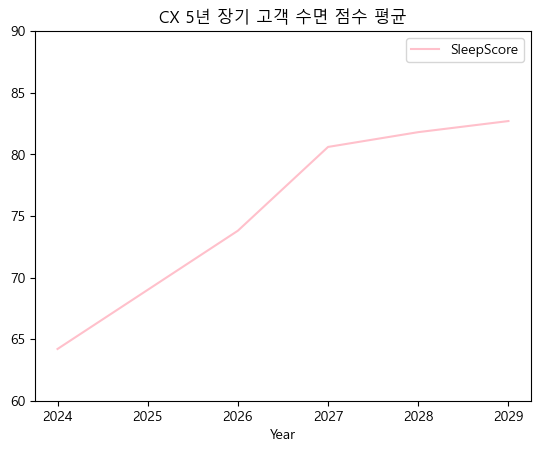

In [5]:
sleep_avg.plot(kind='line', title='CX 5년 장기 고객 수면 점수 평균', ylim = (60,90), color = 'pink')